# Questão
Em um Jupyter Notebook (link do collab ou arquivo), utilize o método K vizinhos mais próximos no problema supervisionado escolhido na Questão 2 OU 3 e:
Aplique e explique os processos de pré-processamento necessários para execução do método K-NN.
Escolha 5 valores de K e mostre os resultados (escolha uma métrica)?
Escolha 2 métricas de similaridade (diferentes distâncias ou outras métricas) para definir o(s) vizinho(s) mais próximos?

- Aplique e explique os processos de pré-processamento necessários para execução do método K-NN.
- Escolha 5 valores de K e mostre os resultados (escolha uma métrica)?
- Escolha 2 métricas de similaridade (diferentes distâncias ou outras métricas) para definir o(s) vizinho(s) mais próximos?

### Base usada:

https://www.kaggle.com/priyanka841/breast-cancer-wisconsin?select=breast+cancer.csv

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        68
           1       0.95      0.89      0.92        46

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



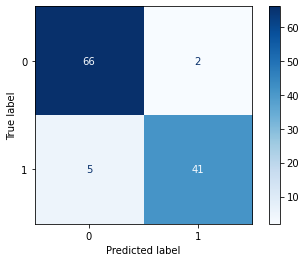

In [5]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster, neighbors, svm, metrics, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split

with open('sample_data/breast_cancer.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, quotechar='|')
    
    X = []
    y = []
    
    a = []
    
    for row in spamreader: # lendo informações do arquivo e adicionando num array
        a.append(row)
    
    a = a[1:]
    
    for row in a: # fazendo o one hot encoding
        if(row[1] == 'B'):
            y.append(0)
        else:
            y.append(1)

    for row in a: # retirando as 2 primeiras colunas que não serão utilizadas
        X.append(row[2:])
        
    X = np.array(X, dtype = np.float64) # transformando itens do array de string para float

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
        
    knn = neighbors.KNeighborsClassifier(n_neighbors = 3, algorithm = "auto")
    knn.fit(X_train, y_train)
    resultKNN = knn.predict(X_test)

    print(classification_report(y_test, resultKNN))
    
    plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
    plt.show()
